# Construimos un algoritmo que arme una red según las especificaciones
En este caso será para una red con una sola capa oculta y con la posibilidad de escoger la funcion de activación de la capa oculta así como el número de nodos que tendrá. Los nodos de las capas de entrada y salida estarán definidos por los propios datos X,Y

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import floor

In [2]:
# RELU
def relu(x):
    return x * (x > 0)

def drelu(x):
    return 1. * (x > 0)

#IDENTIDAD
def iden(X):
    return X

def diden(X):
    return 1

#SIGMOIDE
def sigmoid(X):
    return 1/(1+np.exp(-X))

def dsigmoid(X):
    return sigmoid(X)*(1-sigmoid(X))

#TANGENTE HIPORBÓLICA
def tanh(X):
    return np.tanh(X)
def dtanh(X):
    return 1-tanh(X)**2


In [45]:
def split(X, Y, p_split): #El p_split debe estar dado entre 0 y 1
    nparams = len(X)
    randomize = np.random.permutation(nparams)
    X = X[randomize]
    Y = Y[randomize]
    ntrain = int(p_split * nparams)
    indx = [ntrain]
    X_train, X_test = np.split(X, indx)
    Y_train, Y_test = np.split(Y, indx)
    
    return X_train, Y_train, X_test, Y_test

In [73]:
#función de coste:
def error(vector):
    m = len(vector)
    mse = (1/(2*m))*np.linalg.norm(vector)**2
    return mse

In [74]:
def neuralnet(X, Y, nodos, p_split, learning_rate, epocas, activation, dactivation):
    # Definimos la estructura de la red
    n_entradas=len(X[0])
    n_salidas=len(Y[0])
    
    #definimos los conjuntos de aprendizaje y validación 
    X_learn,Y_learn,X_val,Y_val = split(X,Y,p_split)
    
    #forward
    W1=np.random.randn(n_entradas,nodos)
    W2=np.random.randn(nodos,n_salidas)
    b1=np.random.randn(nodos)
    b2=np.random.randn(n_salidas)
      
    #épocas
    errores=[]
    validacion=[]
    for i in range(epocas):
        #Forward
        z1=np.dot(X_learn,W1)+b1
        a1=activation(z1)
        z2=np.dot(a1,W2)+b2
        a2=z2
        
        #backpropagation
        delta2 = a2-Y_learn
        delta1 = (delta2).dot(W2.T)*dactivation(z1)
        
        errores.append(error(delta2)) #guardamos el error de cada época

        W2 -= learning_rate * a1.T.dot(delta2)
        b2 -= learning_rate * (delta2).sum(axis=0)

        W1 -= learning_rate * X_learn.T.dot(delta1)
        b1 -= learning_rate * (delta1).sum(axis=0)
        print("Época %d, coste %f" %(i+1, error(delta2)))
        
        #Ahora validamos el modelo
        z1 = np.dot(X_val, W1) + b1
        a1 = activation(z1)
        z2 = np.dot(a1,W2)+b2
        a2 = z2
        delta = a2-Y_val
        validacion.append(error(delta))
        
    plt.plot(range(i+1),errores,color='darkcyan',label='Aprendizaje')
    plt.plot(range(i+1),validacion,color='darkred',label='Validación')
    plt.grid()
    plt.legend()
    return W1,b1,W2,b2
        


def evaluate(X, W1, b1, W2, b2, activation):
    z1=np.dot(X,W1)+b1
    a1=activation(z1)
    z2=np.dot(a1,W2)+b2
    a2=z2
    return a2

In [75]:
#Función a emular

X = 3.14*2*np.random.rand(1000,1)
    
Y = np.sin(X)

Época 1, coste 169.597398
Época 2, coste 0.674740
Época 3, coste 0.650468
Época 4, coste 0.631313
Época 5, coste 0.612982
Época 6, coste 0.595423
Época 7, coste 0.578560
Época 8, coste 0.562432
Época 9, coste 0.547024
Época 10, coste 0.532288
Época 11, coste 0.518201
Época 12, coste 0.504723
Época 13, coste 0.491875
Época 14, coste 0.479610
Época 15, coste 0.467880
Época 16, coste 0.456683
Época 17, coste 0.445978
Época 18, coste 0.435756
Época 19, coste 0.425986
Época 20, coste 0.416655
Época 21, coste 0.407753
Época 22, coste 0.399256
Época 23, coste 0.391143
Época 24, coste 0.383399
Época 25, coste 0.375997
Época 26, coste 0.368930
Época 27, coste 0.362175
Época 28, coste 0.355718
Época 29, coste 0.349548
Época 30, coste 0.343655
Época 31, coste 0.338021
Época 32, coste 0.332635
Época 33, coste 0.327475
Época 34, coste 0.322531
Época 35, coste 0.317802
Época 36, coste 0.313274
Época 37, coste 0.308934
Época 38, coste 0.304773
Época 39, coste 0.300778
Época 40, coste 0.296944
Época 4

Época 407, coste 0.093400
Época 408, coste 0.093219
Época 409, coste 0.093038
Época 410, coste 0.092858
Época 411, coste 0.092678
Época 412, coste 0.092499
Época 413, coste 0.092320
Época 414, coste 0.092142
Época 415, coste 0.091965
Época 416, coste 0.091788
Época 417, coste 0.091611
Época 418, coste 0.091435
Época 419, coste 0.091260
Época 420, coste 0.091085
Época 421, coste 0.090910
Época 422, coste 0.090736
Época 423, coste 0.090563
Época 424, coste 0.090389
Época 425, coste 0.090217
Época 426, coste 0.090045
Época 427, coste 0.089873
Época 428, coste 0.089702
Época 429, coste 0.089531
Época 430, coste 0.089360
Época 431, coste 0.089191
Época 432, coste 0.089021
Época 433, coste 0.088852
Época 434, coste 0.088684
Época 435, coste 0.088516
Época 436, coste 0.088348
Época 437, coste 0.088181
Época 438, coste 0.088014
Época 439, coste 0.087848
Época 440, coste 0.087683
Época 441, coste 0.087517
Época 442, coste 0.087352
Época 443, coste 0.087188
Época 444, coste 0.087024
Época 445, c

Época 843, coste 0.046568
Época 844, coste 0.046508
Época 845, coste 0.046448
Época 846, coste 0.046388
Época 847, coste 0.046328
Época 848, coste 0.046268
Época 849, coste 0.046209
Época 850, coste 0.046149
Época 851, coste 0.046090
Época 852, coste 0.046031
Época 853, coste 0.045972
Época 854, coste 0.045913
Época 855, coste 0.045854
Época 856, coste 0.045795
Época 857, coste 0.045736
Época 858, coste 0.045678
Época 859, coste 0.045620
Época 860, coste 0.045561
Época 861, coste 0.045503
Época 862, coste 0.045445
Época 863, coste 0.045387
Época 864, coste 0.045329
Época 865, coste 0.045272
Época 866, coste 0.045214
Época 867, coste 0.045157
Época 868, coste 0.045099
Época 869, coste 0.045042
Época 870, coste 0.044985
Época 871, coste 0.044928
Época 872, coste 0.044872
Época 873, coste 0.044815
Época 874, coste 0.044759
Época 875, coste 0.044702
Época 876, coste 0.044646
Época 877, coste 0.044590
Época 878, coste 0.044534
Época 879, coste 0.044478
Época 880, coste 0.044422
Época 881, c

Época 1155, coste 0.032721
Época 1156, coste 0.032689
Época 1157, coste 0.032657
Época 1158, coste 0.032625
Época 1159, coste 0.032594
Época 1160, coste 0.032562
Época 1161, coste 0.032530
Época 1162, coste 0.032499
Época 1163, coste 0.032467
Época 1164, coste 0.032436
Época 1165, coste 0.032404
Época 1166, coste 0.032373
Época 1167, coste 0.032341
Época 1168, coste 0.032310
Época 1169, coste 0.032279
Época 1170, coste 0.032248
Época 1171, coste 0.032217
Época 1172, coste 0.032186
Época 1173, coste 0.032155
Época 1174, coste 0.032124
Época 1175, coste 0.032093
Época 1176, coste 0.032063
Época 1177, coste 0.032032
Época 1178, coste 0.032001
Época 1179, coste 0.031971
Época 1180, coste 0.031940
Época 1181, coste 0.031910
Época 1182, coste 0.031879
Época 1183, coste 0.031849
Época 1184, coste 0.031818
Época 1185, coste 0.031788
Época 1186, coste 0.031758
Época 1187, coste 0.031728
Época 1188, coste 0.031698
Época 1189, coste 0.031668
Época 1190, coste 0.031638
Época 1191, coste 0.031608
É

Época 1589, coste 0.022955
Época 1590, coste 0.022940
Época 1591, coste 0.022924
Época 1592, coste 0.022908
Época 1593, coste 0.022893
Época 1594, coste 0.022877
Época 1595, coste 0.022862
Época 1596, coste 0.022846
Época 1597, coste 0.022831
Época 1598, coste 0.022815
Época 1599, coste 0.022800
Época 1600, coste 0.022785
Época 1601, coste 0.022769
Época 1602, coste 0.022754
Época 1603, coste 0.022738
Época 1604, coste 0.022723
Época 1605, coste 0.022708
Época 1606, coste 0.022693
Época 1607, coste 0.022677
Época 1608, coste 0.022662
Época 1609, coste 0.022647
Época 1610, coste 0.022632
Época 1611, coste 0.022617
Época 1612, coste 0.022601
Época 1613, coste 0.022586
Época 1614, coste 0.022571
Época 1615, coste 0.022556
Época 1616, coste 0.022541
Época 1617, coste 0.022526
Época 1618, coste 0.022511
Época 1619, coste 0.022496
Época 1620, coste 0.022481
Época 1621, coste 0.022466
Época 1622, coste 0.022451
Época 1623, coste 0.022436
Época 1624, coste 0.022421
Época 1625, coste 0.022407
É

Época 1980, coste 0.018247
Época 1981, coste 0.018238
Época 1982, coste 0.018229
Época 1983, coste 0.018220
Época 1984, coste 0.018211
Época 1985, coste 0.018202
Época 1986, coste 0.018192
Época 1987, coste 0.018183
Época 1988, coste 0.018174
Época 1989, coste 0.018165
Época 1990, coste 0.018156
Época 1991, coste 0.018147
Época 1992, coste 0.018138
Época 1993, coste 0.018129
Época 1994, coste 0.018120
Época 1995, coste 0.018111
Época 1996, coste 0.018102
Época 1997, coste 0.018093
Época 1998, coste 0.018084
Época 1999, coste 0.018075
Época 2000, coste 0.018066


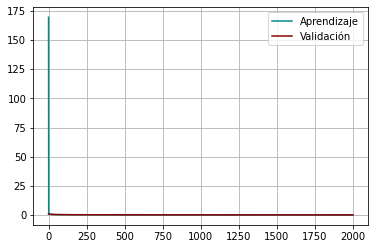

In [99]:
W1, b1, W2, b2 = neuralnet(X, Y, nodos=100, p_split=0.8, learning_rate=1e-6, 
                      epocas=2000, activation=relu, dactivation=drelu)

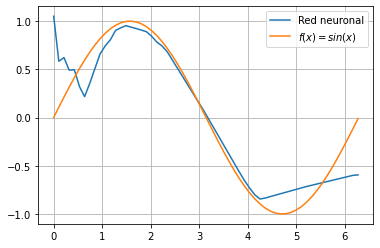

In [101]:
z = np.linspace(np.min(X), np.max(X), 60).reshape(-1, 1)

plt.plot(z, evaluate(z, W1, b1, W2, b2, relu),label='Red neuronal')
plt.plot(z, np.sin(z), label='$f(x)=sin(x)$')
plt.legend()
plt.grid()